# Lista 01 - EDA + Visualização

In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Em determinadas épocas do ano a venda de certos produtos sofre um aumento significativo. Um exemplo disso, são as vendas de sorvete que aumentam bastante no verão. Além do sorvete, outros itens como protetor solar e vestuário de banho podem ganhar maior atenção durante essa época do ano enquanto outros produtos podem não ser tão valorizados. Neste primeiro exercício, implemente a função abaixo que recebe quatro listas e cria um dataframe das quatro. A primeira lista será o índice do seu dataframe. A última, o nome das colunas.


Por exemplo, ao passar:

```python
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
sunglasses = [1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900]
coats = [10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20]
labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

names = ["icecream", "sunglasses", "coats"]

cria_df(labels, ice_cream, sunglasses, coats, names)
```

A tabela deve ser da forma:

```
       icecream   sunglasses   coats
------------------------------------
Jan     3000        1000        10
Fev     2600        800         20
...     ...         ...        ...
Dez     1900        900         20
```

__Dica__

Usar `list(zip(colunas))`. Ou, montar um dicionário na mão.

In [2]:
def cria_df(labels, coluna1, coluna2, coluna3, names):
    # YOUR CODE HERE
    data = list(zip(coluna1, coluna2, coluna3))
    return pd.DataFrame(data, index=labels, columns=names)

In [3]:
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
sunglasses = [1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900]
coats = [10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20]
labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

names = ["icecream", "sunglasses", "coats"]    
df = cria_df(labels, ice_cream, sunglasses, coats, names)
df

,icecream,sunglasses,coats
Jan,3000,1000,10
Fev,2600,800,20
Mar,1400,100,80
Abr,1500,70,120
Mai,1200,50,100
Jun,500,190,500
Jul,300,60,900
Ago,400,50,780
Set,700,100,360
Out,600,120,100


# Exercício 02:

Agora, crie uma função que recebe seu dataframe e crie um gráfico de linhas mostrando a evolução das vendas dos produtos ao longo dos meses em porcentagem. Ou seja, um gráfico relacionando a porcentagem de produtos vendidos naquele mês em relação ao ano como um todo para as vendas de sorvetes, óculos de sol e casacos.

Seu gráfico deve parecer com o plot abaixo:

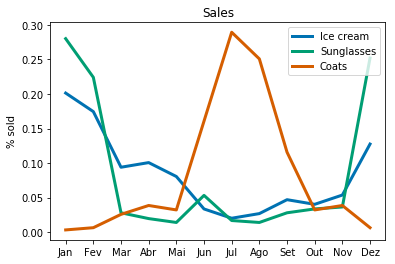

In [4]:
# Note as duas linhas de código abaixo não é a resposta!!! Estou apenas mostrando a imagem que espero!

from IPython.display import Image
Image('plot1.png')

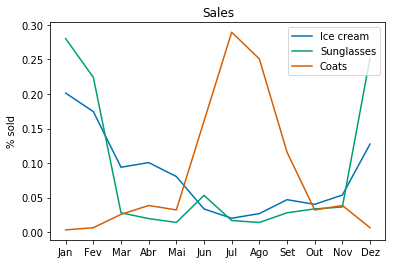

In [5]:
# YOUR CODE HERE

# Computando a porcentagem das vendas
pIcecream = df['icecream'] / df['icecream'].sum()
pSunglasses = df['sunglasses'] / df['sunglasses'].sum()
pCoats = df['coats'] / df['coats'].sum()

# Definindo atributos do plot
plt.title('Sales')
plt.ylabel('% sold')
plt.xticks(np.arange(12), labels)

# Plotando os gráficos
plt.plot(np.arange(12), pIcecream, label='Ice cream')
plt.plot(np.arange(12), pSunglasses, label='Sunglasses')
plt.plot(np.arange(12), pCoats, label='Coats')
plt.legend(loc='upper right')

# Exibindo o gráfico
plt.show()

# Exercício 03:

Utilizando os mesmos dados do exercício anterior, crie uma função que faz um scatter plot entre **icecream** e as outras duas colunas..


__Dicas:__  
1. "_Correlação não é o mesmo que causalidade!_"
1. Abaixo novamente mostramos exemplos de figuras que você pode gerar.

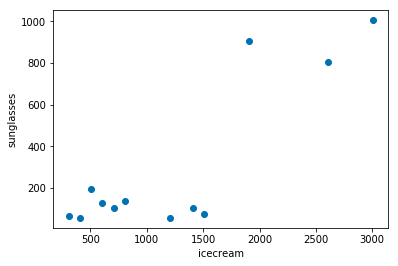

In [6]:
Image('plot2.png')

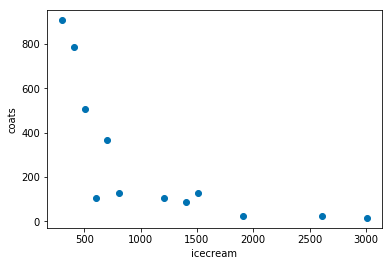

In [7]:
Image('plot3.png')

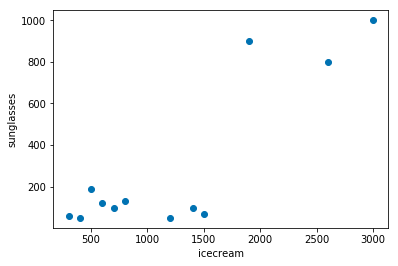

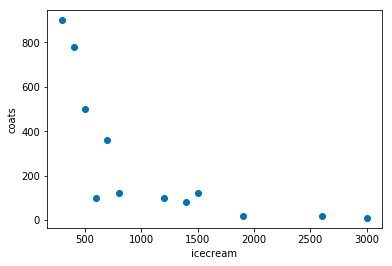

In [8]:
#Exemplo:
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
sunglasses = [1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900]
coats = [10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20]
labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

def scatter(df):
    # YOUR CODE HERE
    plt.xlabel('icecream')
    plt.ylabel('sunglasses')
    plt.scatter(df['icecream'], df['sunglasses'])
    plt.show()
    
    plt.xlabel('icecream')
    plt.ylabel('coats')
    plt.scatter(df['icecream'], df['coats'])
    plt.show()
    
scatter(df)

# Exercício 04:


Agora vamos trabalhar com dados reais. Na mesma pasta deste notebook, encontra-se um `json` com os dados do site http://www.capitaldoscandidatos.info/. Sua tarefa será usar funções como `groupby` e `hist` para analisar tais dados. Diferente das perguntas anteriores, não vamos mais pedir para que você implemente funções. Ou seja, pode trabalhar diretamente nas células do Jupyter estilo um cientista de dados. 

Sua primeira tarefa será indicar os 10 partidos que em média mais lucraram depois da primeira eleição. Ou seja, a diferença de patrimônio entre 2014 (eleição 1) e 2018 (eleição 2). Assim, a célula de solução (abaixo, depois da célula que carrega os dados), deve criar uma variável `resposta`. A mesma é uma série pandas com os top 10 partidos que mais lucraram em média. **A resposta tem que ser um pd.Series, ou seja, uma única coluna!**

__Dicas__

Não necessariamente para este trabalho, mas é sempre bom lembrar:

1. Você já aprendeu a programar e quando estiver repetindo muito chamadas, é um bom sinal que deve criar um função.
2. Notebooks não são IDEs, use para trabalho exploratório.

In [9]:
df = pd.read_json('capital.json')

In [10]:
# Apenas para sabermos o que estamos tratando
df.head()

,ano_dois,ano_um,cargo_pleiteado_1,cargo_pleiteado_2,cod_unidade_eleitoral_1,cod_unidade_eleitoral_2,cpf,estado,nome_urna,patrimonio_eleicao_1,patrimonio_eleicao_2,sequencial_candidato_1,sequencial_candidato_2,sigla_partido,situacao_eleicao_1,situacao_eleicao_2,unidade_eleitoral
0,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,MG,MG,1608657,MG,Stefano Aguiar,2326963.85,2890296.74,130000001189,130000613225,PSD,ELEITO,ELEITO,Minas Gerais
1,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,RJ,RJ,7487738,RJ,Altineu Cortes,4239563.82,3943907.61,190000001858,190000604181,PR,ELEITO,ELEITO,Rio De Janeiro
2,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,BA,BA,31226540,BA,MÃ¡rio Negromonte Jr,1077668.74,2281417.64,50000000167,50000605225,PP,ELEITO,ELEITO,Bahia
3,2018,2014,VICE-GOVERNADOR,DEPUTADO FEDERAL,CE,CE,113735391,CE,Roberto Pessoa,14399524.97,13160762.14,60000000604,60000611570,PSDB,NÃƒO ELEITO,ELEITO,CearÃ¡
4,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,SP,SP,168780860,SP,Vitor Lippi,713217.64,972916.79,250000001354,250000605413,PSDB,ELEITO,ELEITO,SÃ£o Paulo


In [11]:
# YOUR CODE HERE
partidos = df.groupby('sigla_partido')
lucros = partidos['patrimonio_eleicao_2'].sum() - partidos['patrimonio_eleicao_1'].sum()

resposta = lucros.sort_values()[::-1][:10]

Plote sua resposta abaixo!

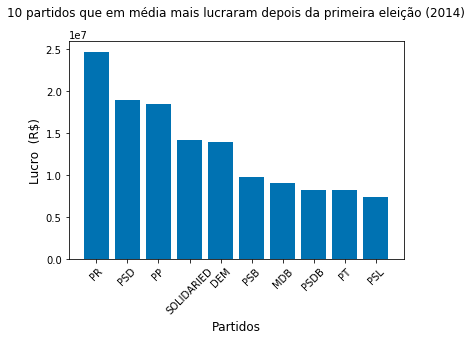

In [12]:
# YOUR CODE HERE
# Definindo atributos do plot
plt.title('10 partidos que em média mais lucraram depois da primeira eleição (2014)', pad=25)
plt.xlabel('Partidos', fontsize=12)
plt.ylabel('Lucro  (R$)', fontsize=12)
plt.xticks(np.arange(10), resposta.index, rotation=45)

# Plotando um gráfico de barras para os valores
plt.bar(np.arange(10), resposta)

# Exibindo o plot
plt.show()

# Exercício 05:


Por fim, plote o histograma dos valores acima (lucro entre eleições) para todos os partidos. Brinque com valores diferentes do número de bins e interprete os dados. Para que a correção funcione, use a chamada da seguinte forma. Brinque também com variações de histograma normalizado ou não.

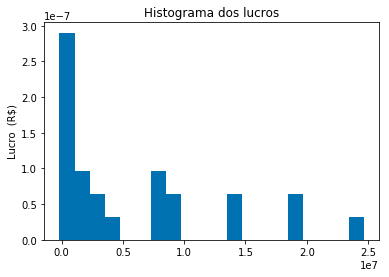

In [13]:
df = pd.read_json('capital.json') # carregando os dados +1 vez, caso tenha alterado.
# YOUR CODE HERE

# Computand os valores a serem plotados
partidos = df.groupby('sigla_partido')
lucros = partidos['patrimonio_eleicao_2'].sum() - partidos['patrimonio_eleicao_1'].sum()

# Definindo atributos do plot
plt.title('Histograma dos lucros')
plt.ylabel('Lucro  (R$)')

# Plotando o histograma
plt.hist(lucros, bins=20, density=True)

# Exibindo o plot
plt.show()